<a href="https://colab.research.google.com/github/AlejandroPinto5/KNN-algorithm/blob/main/Simple-classification-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**K-Nearest Neighbour Classification algorithm**

Model to predict survived people based on the features of the person. This dataset is a clean version of the Titanic dataset and looking the best k with elbow method. Evaluation metric F1 is used.

In [57]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [11]:
#Dataset
url = 'https://raw.githubusercontent.com/AlejandroPinto5/KNN-algorithm/main/data_cleaned.csv'
df = pd.read_csv(url)
df

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.000000,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.000000,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.000000,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.000000,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,13.0000,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
887,1,19.000000,30.0000,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
888,0,29.699118,23.4500,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
889,1,26.000000,30.0000,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0


In [16]:
df.describe()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,32.204208,0.242424,0.206510,0.551066,0.352413,0.647587,0.682379,0.234568,...,0.760943,0.132435,0.089787,0.005612,0.004489,0.005612,0.001122,0.188552,0.086420,0.725028
std,0.486592,13.002015,49.693429,0.428790,0.405028,0.497665,0.477990,0.477990,0.465813,0.423966,...,0.426747,0.339154,0.286037,0.074743,0.066890,0.074743,0.033501,0.391372,0.281141,0.446751
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.699118,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,35.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
#Separate independetand dependent variables
x = df.drop(['Survived'], axis= 1)
y = df['Survived']

In [21]:
# MinMAx Scaler to normalize data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
df_xScaled = pd.DataFrame(x_scaled, columns = x.columns)
df_xScaled

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.334004,0.025374,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,0.233476,0.058556,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0.367921,0.045771,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,0.321438,0.058556,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
#Split the dataset into train set and test set
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 56, stratify = y) 

In [51]:
#KNN classifier and metric F1score
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import f1_score

clasfr = knn(n_neighbors = 10) #Neighbours (10 is a test, it will know the best in elbow method)
clasfr.fit(train_x, train_y)  #fitting
test_predict = clasfr.predict(test_x) #Predicting over train set
k = f1_score(test_predict, test_y)  # Calculating F1
print('Test F1 Score: ', k) # High value, better the model

Test F1 Score:  0.5931034482758621


In [38]:
#Elbow method
def elbow(k):
  test_error = []
  for i in k:
    clasfr = knn(n_neighbors = i)
    clasfr.fit(train_x, train_y)
    tmpl = clasfr.predict(test_x)
    tmpl = f1_score(tmpl, test_y)
    err = 1-tmpl
    test_error.append(err)
  return test_error

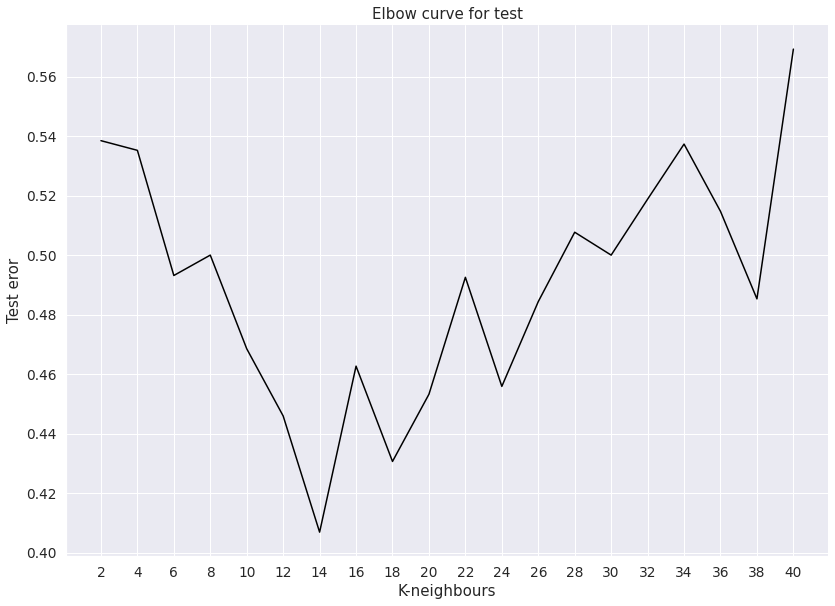

In [75]:
#Plotting k range
k = range(2,42,2)
test = elbow(k)

sb.set_style("darkgrid")
fig = sb.relplot(x = k,y = test, kind = 'line', color = 'black', height=8.27, aspect=11.7/8.27)
fig.set_axis_labels('K-neighbours', 'Test eror')
plt.title('Elbow curve for test')
fig.set(xticks = range(2,42,2))


Conclusion: The best K-neighbour is 14 to obtain the hishest F1 score.